# Covariance Matrix Adaptation Evolution Strategy (CMA-ES)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D 

## Rastrigin function implementation - optimization task 1
#### (https://en.wikipedia.org/wiki/Rastrigin_function)

In [2]:
def rastrigin(X, Y):    
    Z = (X**2 - 10 * np.cos(2 * np.pi * X)) + (Y**2 - 10 * np.cos(2 * np.pi * Y)) + 20
    return Z

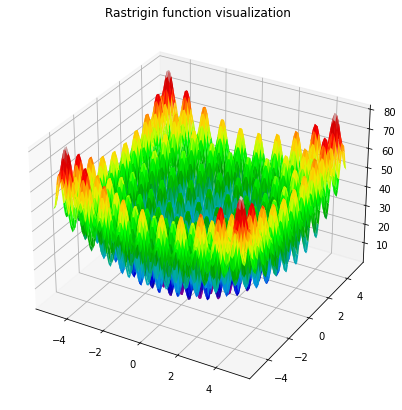

In [3]:
X = np.linspace(-5, 5, 100)     
Y = np.linspace(-5, 5, 100)     
 
X, Y = np.meshgrid(X, Y)
Z=rastrigin(X, Y)
 
fig = plt.figure(figsize=(7,7)) 
ax = fig.gca(projection='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
  cmap=cm.nipy_spectral, linewidth=0.08,
  antialiased=True)    
plt.title('Rastrigin function visualization')
plt.show()

##  Rosenbrock function - optimization task 2
#### (https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.optimize.rosen.html)

In [4]:
def rosenbrock(x,y):
    return (1 + x)**2 + 100*(y - x**2)**2

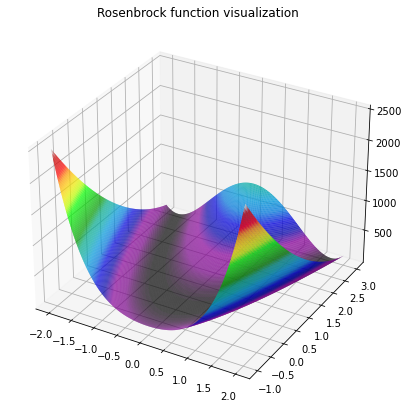

In [77]:
x = np.linspace(-2,2,250)
y = np.linspace(-1,3,250)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

fig = plt.figure(figsize=(7,7)) 
ax = fig.gca(projection='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
  cmap=cm.nipy_spectral, linewidth=0.08,
  antialiased=True)
plt.title('Rosenbrock function visualization')
plt.show()

## CMA-ES implementation tests
#### (https://pypi.org/project/cma/)

In [76]:
import cma
#help(cma.ff) #available test functions

Result tuple contains in the given position and as attribute
   
   - 0 ``xbest`` best solution evaluated
   - 1 ``fbest`` objective function value of best solution
   - 2 ``evals_best`` evaluation count when ``xbest`` was evaluated
   - 3 ``evaluations`` evaluations overall done
   - 4 ``iterations``
   - 5 ``xfavorite`` distribution mean in "phenotype" space, to be
     considered as current best estimate of the optimum
   - 6 ``stds`` effective standard deviations, can be used to
     compute a lower bound on the expected coordinate-wise distance
     to the true optimum, which is (very) approximately stds[i] *
     dimension**0.5 / min(mueff, dimension) / 1.5 / 5 ~ std_i *
     dimension**0.5 / min(popsize / 2, dimension) / 5, where
     dimension = CMAEvolutionStrategy.N and mueff =
     CMAEvolutionStrategy.sp.weights.mueff ~ 0.3 * popsize.
   - 7 ``stop`` termination conditions in a dictionary

## Rastrigin test function CMA-ES

In [74]:
es = cma.CMAEvolutionStrategy(3 * [0], 0.5)
es.optimize(cma.ff.rastrigin)
results=[]
print('______________________________________________________________________')
res=es.result_pretty()
print('Best solution:')
print(res[0])
print('Function value of best solution:')
print(res[1])
print('Iterations:')
print(res[4])

(3_w,7)-aCMA-ES (mu_w=2.3,w_1=58%) in dimension 3 (seed=643092, Wed Dec  9 23:02:29 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      7 1.971338529528858e+01 1.0e+00 4.12e-01  4e-01  4e-01 0:00.0
    2     14 1.609835552686148e+01 1.3e+00 3.22e-01  2e-01  3e-01 0:00.0
    3     21 8.658970282498125e+00 1.4e+00 2.64e-01  2e-01  2e-01 0:00.0
  100    700 2.842170943040401e-14 1.9e+00 4.13e-06  9e-09  2e-08 0:00.1
  109    763 0.000000000000000e+00 1.9e+00 1.47e-06  2e-09  3e-09 0:00.1
______________________________________________________________________
termination on tolfun=1e-11
final/bestever f-value = 0.000000e+00 0.000000e+00
incumbent solution: [-1.4887711298551283e-09, 4.927736331453646e-10, 1.6943841445603718e-09]
std deviation: [2.2848729897051226e-09, 3.1131922707969063e-09, 1.9400384475534183e-09]
Best solution:
[-1.67055707e-09 -3.64939707e-09 -2.92858389e-10]
Function value of best solution:
0.0
Iterations:
109


### Testing with simple genetic algorithm

 The best solution found:                                                                           
 [0.00410573 0.0060865  0.00576868]

 Objective function:
 0.017294053507594498


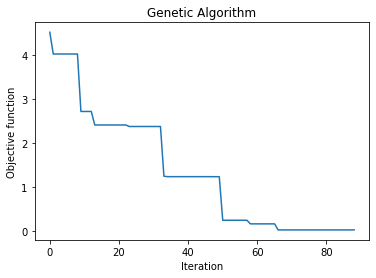

In [75]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

varbound=np.array([[-5,5]]*3)
params={'max_num_iteration': 200, 
        'population_size': 100, 
        'mutation_probability': 0.1, 
        'elit_ratio': 0.01, 
        'crossover_probability': 0.5, 
        'parents_portion': 0.3, 
        'crossover_type': 'uniform', 
        'max_iteration_without_improv': 20}
model=ga(function=cma.ff.rastrigin, 
         dimension=3,
         variable_type='real',
         variable_boundaries=varbound,
         algorithm_parameters=params)

model.run()
print(model.param)  

### Testing with differential evolution